# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

## Juan Diego Barnes, Francisco Legaspe, Rodrigo Martin

### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

Comenzamos cargando el conjunto de módulos o librerías que utilizaremos

In [54]:
import matplotlib.pyplot as plt # Para graficar
import requests # Para hacer pedidos a la web
from bs4 import BeautifulSoup # Para parsear el HTML
import pandas as pd # Para manipular los datos

#### Ejercicio 1
Nuestro objetivo es conectarnos a la API de Mercado Libre, para obtener los ítems de una consulta de búsqueda. Principalmente estamos interesados en obtener los precios, nuestra búsqueda de precios de pavas electricas de 1.7 litros, queriendo conocer la distribución de precios de estos.

In [55]:
# URL de la página a scrapear
busqueda = "Pava Electrica 1.7L"

r = requests.get('https://listado.mercadolibre.com.ar/{}#D[A:{}]'.format(busqueda.replace(' ','-'),busqueda))

contenido = r.content
soup = BeautifulSoup(contenido, 'html.parser')

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [56]:
alldivs = soup.find_all('div',{ 'class':'andes-card'})
#Array donde estarán los productos
productos_array = []
#Extraigo los datos de cada producto y los guardo
for item in alldivs:
    data={}
    data['Nombre']=item.find('h2',{'class':'ui-search-item__title'}).text
    precio_symbol = item.find('span', {'class': 'andes-money-amount__currency-symbol'}).text
    precio_fraction = item.find('span', {'class': 'andes-money-amount__fraction'}).text
    data['Precio'] = f'{precio_symbol}{precio_fraction}'
    
    productos_array.append(data)
    print(data)
    #Creamos el dataframe con los datos extraidos
    productos_df = pd.DataFrame(productos_array)
    

{'Nombre': 'Pava Eléctrica Sansei Pe1821bp Selector De Temperatura 1.7l', 'Precio': '$25.499'}
{'Nombre': 'Philco Pe0821npp Pava Electrica 1.7l Hervidora Negro', 'Precio': '$15.599'}
{'Nombre': 'Pava eléctrica Peabody PE-KV8215 roja 220V 1.7L', 'Precio': '$38.499'}
{'Nombre': 'Pava Eléctrica Hd9368/90 1,7 Litros 2200 W - Philips', 'Precio': '$38.999'}
{'Nombre': 'Atma Peatp21vbp Pava Electrica Hervidora 1.7l Vintage Negro', 'Precio': '$38.590'}
{'Nombre': 'Pava Eléctrica Atma Pe0821nap Negra 220v 1.7l', 'Precio': '$16.990'}
{'Nombre': 'Pava eléctrica Smartlife SL-EK1714 negra 220V 1.7L', 'Precio': '$18.799'}
{'Nombre': 'Pava Eléctrica Hd9368/00 1,7 Litros 2200w Blanco - Philips', 'Precio': '$29.890'}
{'Nombre': 'Pava eléctrica Peabody PE-KV8215 plateada 220V 1.7L', 'Precio': '$40.299'}
{'Nombre': 'Pava eléctrica Daewoo DEK-1310 blanca 220V - 240V 1.7L', 'Precio': '$31.950'}
{'Nombre': 'Pava eléctrica Smartlife SL-EK1510IX plateada y negra 220V 1.5L', 'Precio': '$26.299'}
{'Nombre': 'Pa

De esta forma obtuvimos los precios, pero estos estan en formato de texto ahora vamos a definirlos como numéricos para poder operar con ellos:

In [57]:
# Eliminamos el signo $ de la columna precio
productos_df['Precio'] = productos_df['Precio'].str[1:]
# Los puntos que observamos son separadores de miles y python lo interpreta como separador decimal, por lo que los eliminamos
productos_df['Precio'] = productos_df['Precio'].str.replace('.','')
# Ahora onvertimos la columna precio a int
productos_df['Precio'] = productos_df['Precio'].astype(int)

productos_df


,Nombre,Precio
0,Pava Eléctrica Sansei Pe1821bp Selector De Tem...,25499
1,Philco Pe0821npp Pava Electrica 1.7l Hervidora...,15599
2,Pava eléctrica Peabody PE-KV8215 roja 220V 1.7L,38499
3,"Pava Eléctrica Hd9368/90 1,7 Litros 2200 W - P...",38999
4,Atma Peatp21vbp Pava Electrica Hervidora 1.7l ...,38590
5,Pava Eléctrica Atma Pe0821nap Negra 220v 1.7l,16990
6,Pava eléctrica Smartlife SL-EK1714 negra 220V ...,18799
7,"Pava Eléctrica Hd9368/00 1,7 Litros 2200w Blan...",29890
8,Pava eléctrica Peabody PE-KV8215 plateada 220V...,40299
9,Pava eléctrica Daewoo DEK-1310 blanca 220V - 2...,31950


In [58]:
# Calcular el precio promedio
precio_promedio = productos_df['Precio'].mean()

# Calcular el precio mínimo
precio_minimo = productos_df['Precio'].min()

# Calcular el precio máximo
precio_maximo = productos_df['Precio'].max()

print(f'Precio Promedio: {precio_promedio}')
print(f'Precio Mínimo: {precio_minimo}')
print(f'Precio Máximo: {precio_maximo}')





Precio Promedio: 30783.98
Precio Mínimo: 9299
Precio Máximo: 119999


#### Ejercicio 3
Vamor a armar un histograma de los precios. Para intentar identificar <i>outliers<i> en los precios obtenidos:

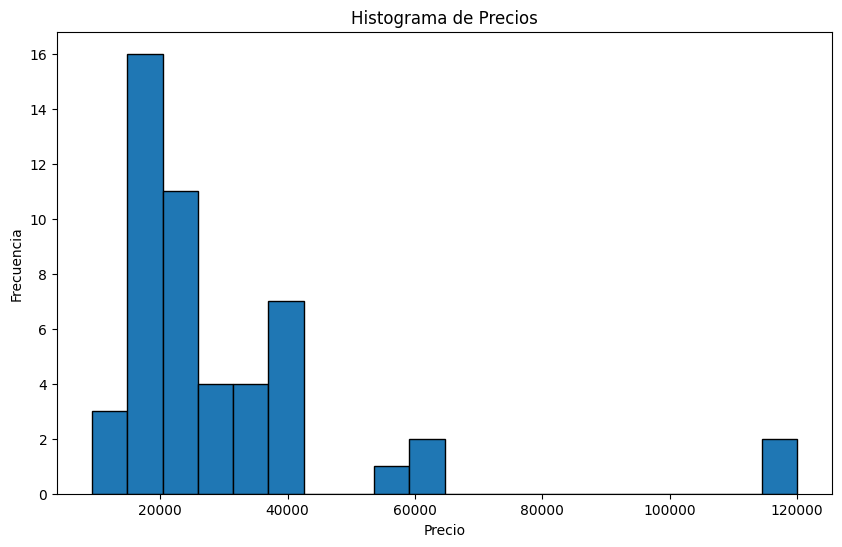

In [60]:
# Eliminar caracteres no numéricos y convertir la columna 'Precio' a tipo float
productos_df['Precio'] = productos_df['Precio'].astype(str).replace('[^\d.]', '', regex=True).astype(float)
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()


Podemos apreciar facilmente que en el grafico que el valor cercano a $120,000 como un outlier.

Ahora intentemos identificar los valores atipicos con alguna medida mas "objetiva", que el analisis visual:

Valores atípicos:
                                               Nombre    Precio
26  Pava eléctrica Peabody PE-DKE655 Smartchef pla...  119999.0
29  Pava eléctrica Peabody PE-DK17411 Smartchef ac...  119999.0
32    Pava eléctrica Oster BVSTKT4970 negra 220V 1.7L   62700.0


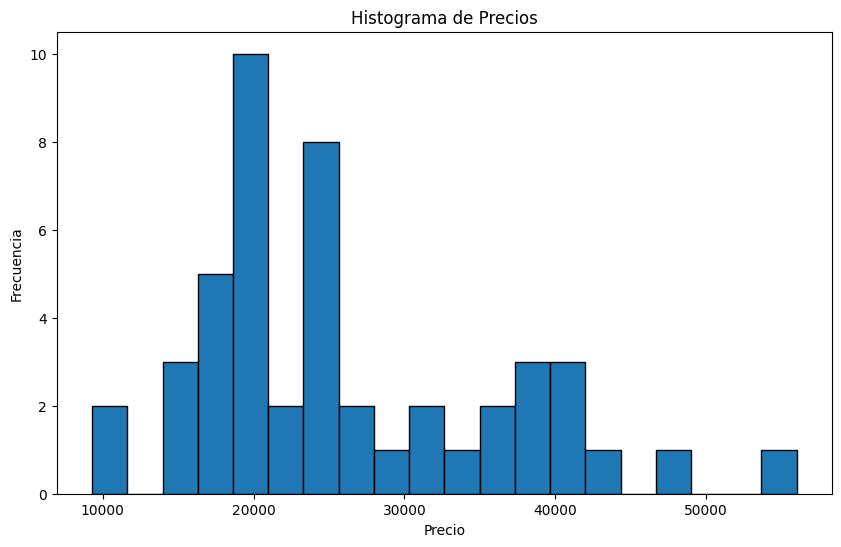

In [45]:
# Detectar y mostrar valores atípicos (Outliers)
# Calcular el primer y tercer cuartil
Q1 = productos_df['Precio'].quantile(0.25)
Q3 = productos_df['Precio'].quantile(0.75)
# Calcular el rango intercuartil
IQR = Q3 - Q1
# Calcular los límites inferior y superior para detección de valores atípicos como 1.5 veces el rango intercuartil por debajo del primer cuartil y por encima del tercer cuartil, respectivamente
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = productos_df[(productos_df['Precio'] < lower_bound) | (productos_df['Precio'] > upper_bound)]
print('Valores atípicos:')
print(outliers)

# Hacemos el droop de los valores atípicos
productos_df = productos_df.drop(outliers.index)

# Volvemos a graficar el histograma
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()
